In [27]:
# Cell 1: Load the breast cancer dataset and inspect its structure

import pandas as pd
import numpy as np

# Load cancer dataset from CSV
cancer_df = pd.read_csv("../Dataset/cancer.csv")


print("Cancer dataset loaded.\n")

# Peek at the first few rows
display(cancer_df.head())

# Show schema, dtypes, and non-null counts
print("\nInfo:")
print(cancer_df.info())

# Check how many missing values exist in each column
print("\nMissing values per column:")
print(cancer_df.isnull().sum())


Cancer dataset loaded.



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se       

In [2]:
# Cell 2: Basic cleaning and target encoding
# - Make a working copy of the original data
# - Drop non-informative columns (e.g., ID columns)
# - Encode 'diagnosis' (M/B) into a binary numeric target

cancer = cancer_df.copy()

# Drop useless identifier columns if they exist
for col in ["id", "Unnamed: 32"]:
    if col in cancer.columns:
        cancer = cancer.drop(columns=[col])

# Encode target: diagnosis (M = malignant -> 1, B = benign -> 0)
if "diagnosis" in cancer.columns:
    cancer["diagnosis"] = cancer["diagnosis"].map({"M": 1, "B": 0})

print("Unique values in diagnosis:", cancer["diagnosis"].unique())

print("\nAfter cleaning:")
display(cancer.head())

print("\nInfo:")
print(cancer.info())

print("\nMissing values after cleaning:")
print(cancer.isnull().sum())


Unique values in diagnosis: [1 0]

After cleaning:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [9]:
# Cell 3: Define feature matrix X and target y, then create train/test split

from sklearn.model_selection import train_test_split

# All features except the diagnosis label
X_cancer = cancer.drop(columns=["diagnosis"])
# Binary target (1 = malignant, 0 = benign)
y_cancer = cancer["diagnosis"]

print("Shape of X_cancer:", X_cancer.shape)
print("Shape of y_cancer:", y_cancer.shape)

# Stratified split to preserve class proportions in train and test sets
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer,
    y_cancer,
    test_size=0.2,
    random_state=42,
    stratify=y_cancer
)

print("\nTrain/Test split done:")
print("X_cancer_train:", X_cancer_train.shape)
print("X_cancer_test :", X_cancer_test.shape)
print("y_cancer_train:", y_cancer_train.shape)
print("y_cancer_test :", y_cancer_test.shape)


Shape of X_cancer: (569, 30)
Shape of y_cancer: (569,)

Train/Test split done:
X_cancer_train: (455, 30)
X_cancer_test : (114, 30)
y_cancer_train: (455,)
y_cancer_test : (114,)


In [10]:
# Cell 4: Import classifiers, evaluation metrics, and helper tools

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean, publication-style look for plots
sns.set_style("whitegrid")


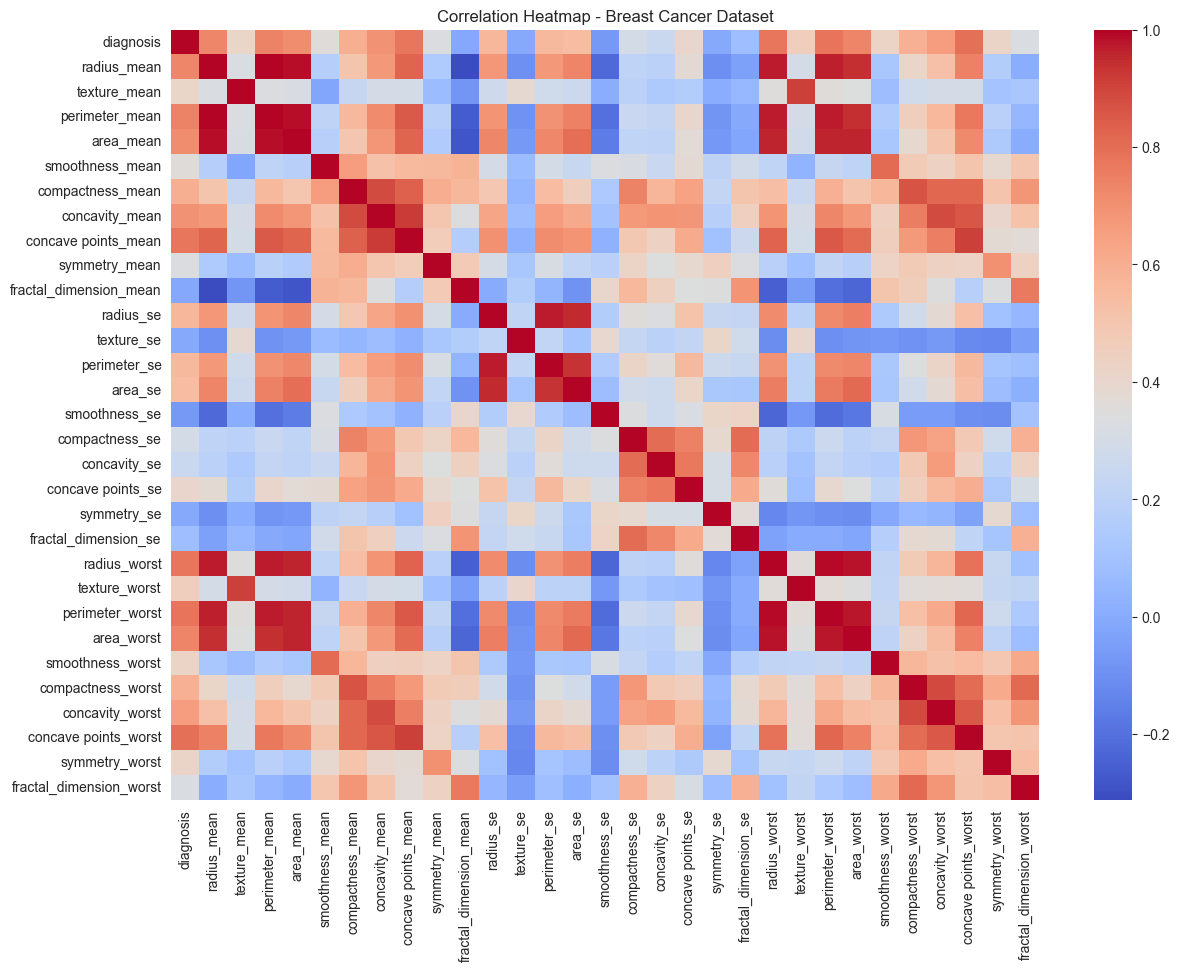

In [11]:
# Cell 5: Visualize feature correlations using a heatmap
# This helps identify redundant or highly correlated features.

plt.figure(figsize=(14, 10))
sns.heatmap(cancer.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Breast Cancer Dataset")
plt.show()


In [18]:
# Cell 6: Define pipelines for all cancer models (updated Logistic Regression)

cancer_models = {
    "Logistic Regression": make_pipeline(
        SimpleImputer(strategy="median"),
        LogisticRegression(max_iter=5000)  # increased max_iter to avoid convergence warnings
    ),
    "SVM": make_pipeline(
        SimpleImputer(strategy="median"),
        SVC(probability=True)
    ),
    "KNN": make_pipeline(
        SimpleImputer(strategy="median"),
        KNeighborsClassifier()
    ),
    "Decision Tree": make_pipeline(
        SimpleImputer(strategy="median"),
        DecisionTreeClassifier(random_state=42)
    ),
    "Random Forest": make_pipeline(
        SimpleImputer(strategy="median"),
        RandomForestClassifier(random_state=42)
    ),
    "Naive Bayes": make_pipeline(
        SimpleImputer(strategy="median"),
        GaussianNB()
    ),
    "Gradient Boosting": make_pipeline(
        SimpleImputer(strategy="median"),
        GradientBoostingClassifier(random_state=42)
    ),
    "XGBoost": make_pipeline(
        SimpleImputer(strategy="median"),
        XGBClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            eval_metric="logloss",
            random_state=42
        )
    )
}

print("Models ready:")
print(list(cancer_models.keys()))


Models ready:
['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']


In [13]:
# Sanity check: make sure training data is defined before training models

print("X_cancer_train is defined:", 'X_cancer_train' in globals())
print("y_cancer_train is defined:", 'y_cancer_train' in globals())
print("X_cancer_test  is defined:", 'X_cancer_test'  in globals())
print("y_cancer_test  is defined:", 'y_cancer_test'  in globals())

if 'X_cancer_train' in globals():
    print("X_cancer_train shape:", X_cancer_train.shape)


X_cancer_train is defined: True
y_cancer_train is defined: True
X_cancer_test  is defined: True
y_cancer_test  is defined: True
X_cancer_train shape: (455, 30)


In [19]:
# Cell 7: Train all candidate cancer models and compute evaluation metrics
# ----------------------------------------------------------------------
# For each model in cancer_models:
#   • Fit on training data
#   • Predict on train & test sets
#   • Compute Train Accuracy, Test Accuracy, Precision, Recall, F1
#   • Store results in cancer_results list
#   • Keep trained models in cancer_trained_models for later use
# ----------------------------------------------------------------------

cancer_results = []
cancer_trained_models = {}

for name, model in cancer_models.items():
    print(f"Training {name}...")
    
    # Fit model on training data
    model.fit(X_cancer_train, y_cancer_train)
    cancer_trained_models[name] = model

    # Predictions
    y_train_pred = model.predict(X_cancer_train)
    y_test_pred  = model.predict(X_cancer_test)

    # Metrics
    train_acc = accuracy_score(y_cancer_train, y_train_pred)
    test_acc  = accuracy_score(y_cancer_test, y_test_pred)
    prec      = precision_score(y_cancer_test, y_test_pred)
    rec       = recall_score(y_cancer_test, y_test_pred)
    f1        = f1_score(y_cancer_test, y_test_pred)

    # Store results for DataFrame later
    cancer_results.append({
        "Model": name,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": test_acc,
        "Precision": prec,
        "Recall": rec,
        "F1_Score": f1
    })

    # Print summary for this model
    print(f"{name:20s} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}, F1: {f1:.3f}")
    print("-" * 60)

# Convert to DataFrame for easier comparison
cancer_results_df = pd.DataFrame(cancer_results).set_index("Model")

print("\nSummary of model performance (Cancer):")
display(cancer_results_df)


Training Logistic Regression...
Logistic Regression  -> Train: 0.963, Test: 0.939, F1: 0.911
------------------------------------------------------------
Training SVM...
SVM                  -> Train: 0.919, Test: 0.904, F1: 0.849
------------------------------------------------------------
Training KNN...
KNN                  -> Train: 0.949, Test: 0.912, F1: 0.868
------------------------------------------------------------
Training Decision Tree...
Decision Tree        -> Train: 1.000, Test: 0.930, F1: 0.905
------------------------------------------------------------
Training Random Forest...
Random Forest        -> Train: 1.000, Test: 0.974, F1: 0.963
------------------------------------------------------------
Training Naive Bayes...
Naive Bayes          -> Train: 0.943, Test: 0.939, F1: 0.909
------------------------------------------------------------
Training Gradient Boosting...
Gradient Boosting    -> Train: 1.000, Test: 0.965, F1: 0.950
-------------------------------------

,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score
Model,,,,,
Logistic Regression,0.962637,0.938596,0.972973,0.857143,0.911392
SVM,0.918681,0.903509,1.000000,0.738095,0.849315
KNN,0.949451,0.912281,0.970588,0.785714,0.868421
Decision Tree,1.000000,0.929825,0.904762,0.904762,0.904762
Random Forest,1.000000,0.973684,1.000000,0.928571,0.962963
Naive Bayes,0.942857,0.938596,1.000000,0.833333,0.909091
Gradient Boosting,1.000000,0.964912,1.000000,0.904762,0.950000
XGBoost,1.000000,0.973684,1.000000,0.928571,0.962963


In [20]:
# Cell 8: Compare train vs test accuracy for all cancer models
# -----------------------------------------------------------
# - Calculates difference between train and test accuracy for each model
#   to check overfitting (large gap) or underfitting (low accuracy).
# - Helps identify which models generalize well on unseen data.

print("Train vs Test Accuracy for each model (Cancer):\n")

for model_name, row in cancer_results_df.iterrows():
    train_acc = row["Train_Accuracy"]
    test_acc  = row["Test_Accuracy"]
    diff = train_acc - test_acc
    print(f"{model_name:20s} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}, Diff (Train - Test): {diff:.3f}")


Train vs Test Accuracy for each model (Cancer):

Logistic Regression  -> Train: 0.963, Test: 0.939, Diff (Train - Test): 0.024
SVM                  -> Train: 0.919, Test: 0.904, Diff (Train - Test): 0.015
KNN                  -> Train: 0.949, Test: 0.912, Diff (Train - Test): 0.037
Decision Tree        -> Train: 1.000, Test: 0.930, Diff (Train - Test): 0.070
Random Forest        -> Train: 1.000, Test: 0.974, Diff (Train - Test): 0.026
Naive Bayes          -> Train: 0.943, Test: 0.939, Diff (Train - Test): 0.004
Gradient Boosting    -> Train: 1.000, Test: 0.965, Diff (Train - Test): 0.035
XGBoost              -> Train: 1.000, Test: 0.974, Diff (Train - Test): 0.026


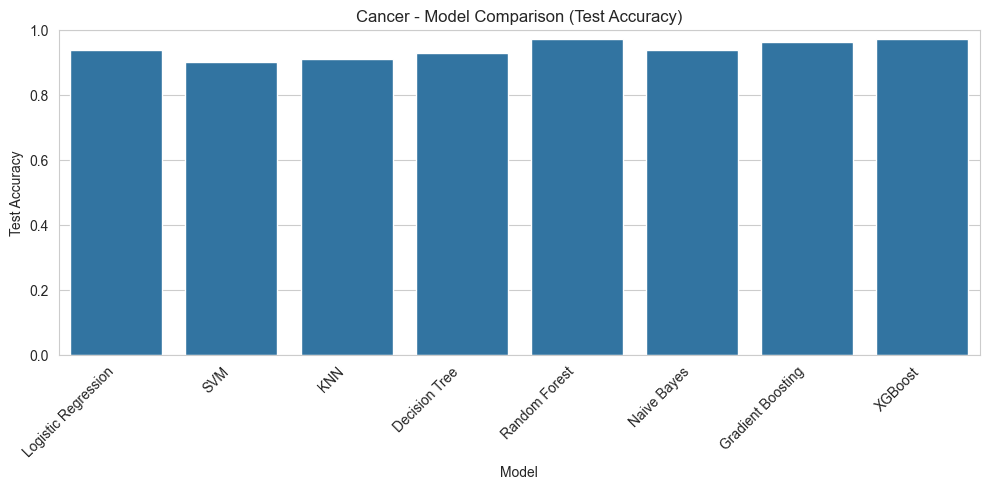

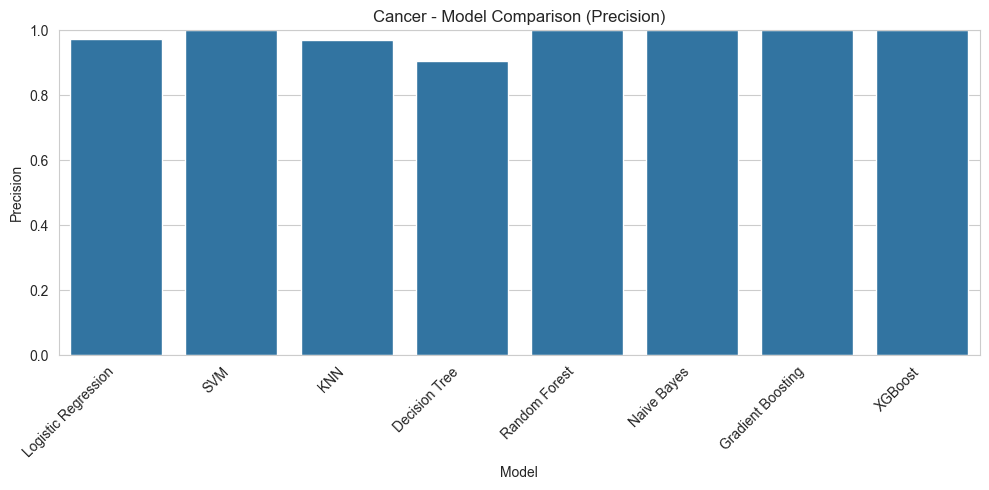

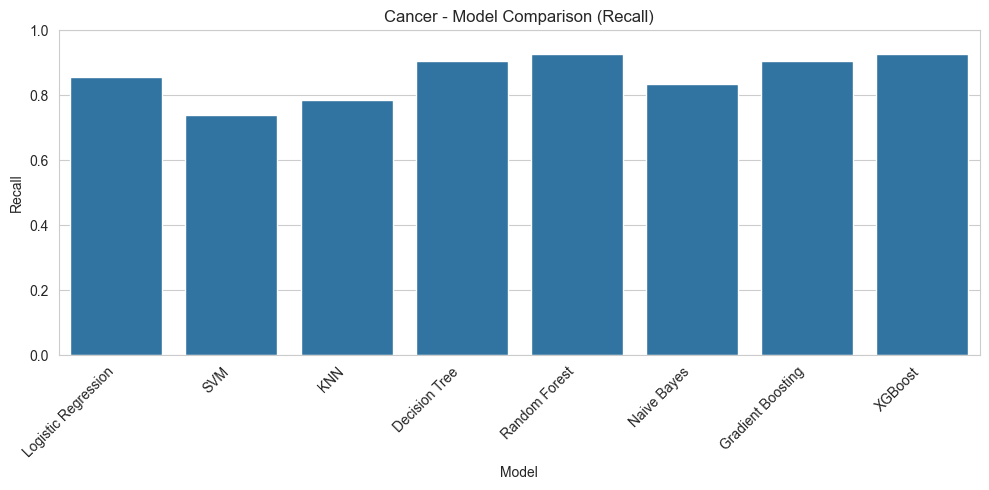

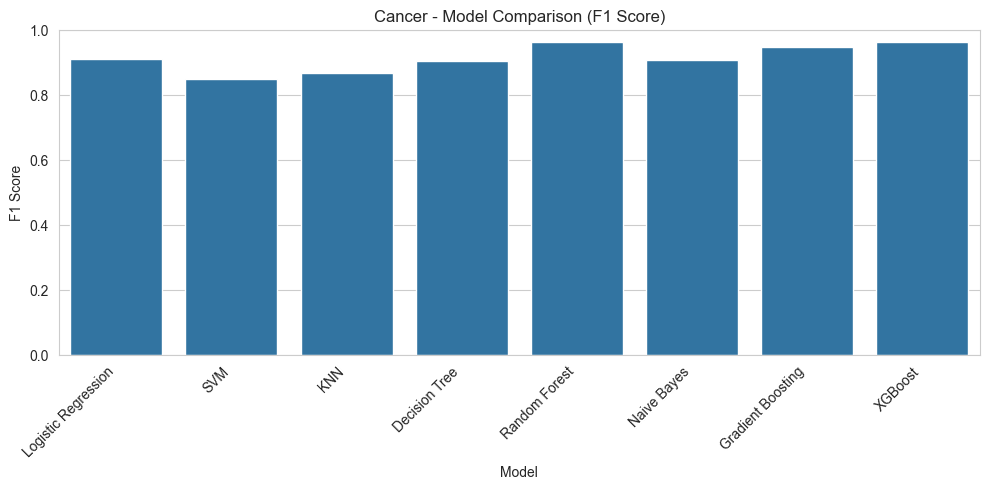

In [21]:
# Cell 9: Bar plot comparison of key evaluation metrics for cancer models
# -----------------------------------------------------------------------
# - Visualizes Test Accuracy, Precision, Recall, and F1-Score for each model.
# - Makes it easy to compare performance and identify top-performing algorithms.
# - Uses seaborn barplots for clean, readable metric comparison.


metrics_to_plot = ["Test_Accuracy", "Precision", "Recall", "F1_Score"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=cancer_results_df.index, y=cancer_results_df[metric].values)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)
    plt.ylabel(metric.replace("_", " "))
    plt.title(f"Cancer - Model Comparison ({metric.replace('_', ' ')})")
    plt.tight_layout()
    plt.show()


<Figure size 400x400 with 0 Axes>

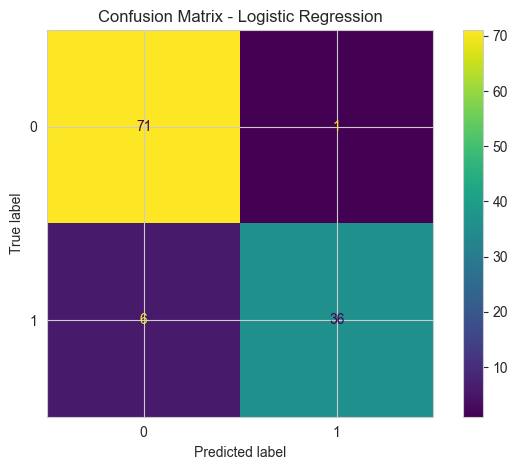

<Figure size 400x400 with 0 Axes>

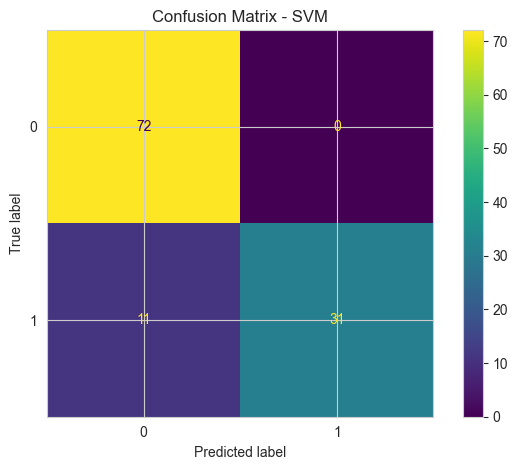

<Figure size 400x400 with 0 Axes>

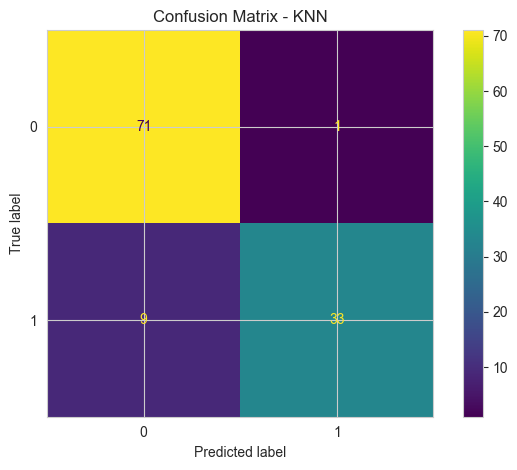

<Figure size 400x400 with 0 Axes>

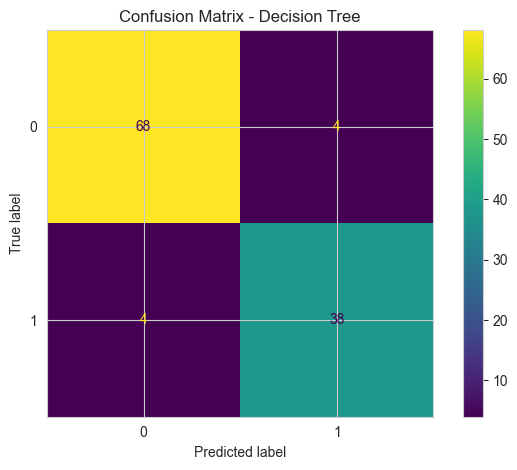

<Figure size 400x400 with 0 Axes>

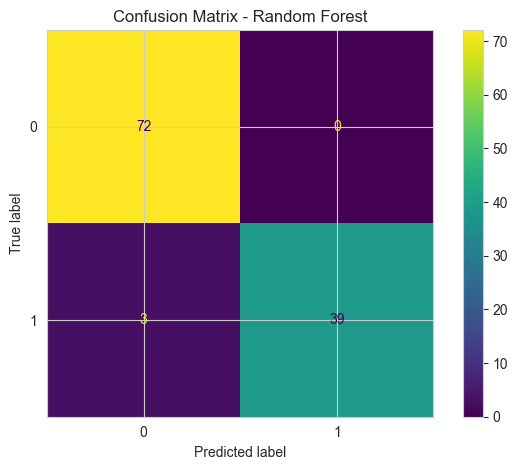

<Figure size 400x400 with 0 Axes>

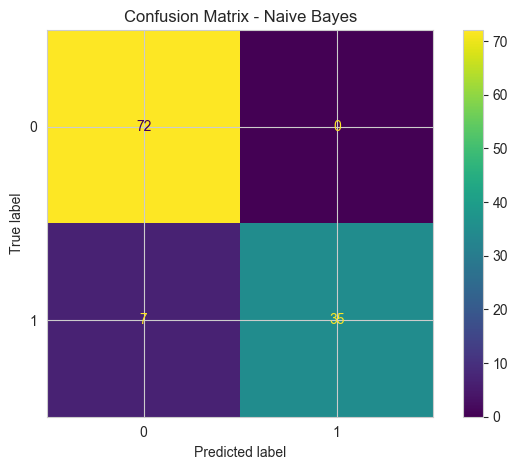

<Figure size 400x400 with 0 Axes>

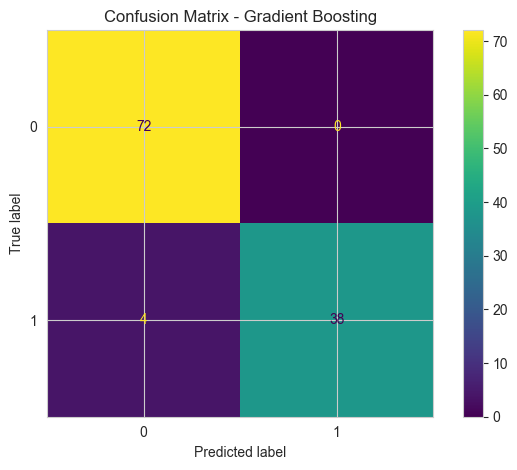

<Figure size 400x400 with 0 Axes>

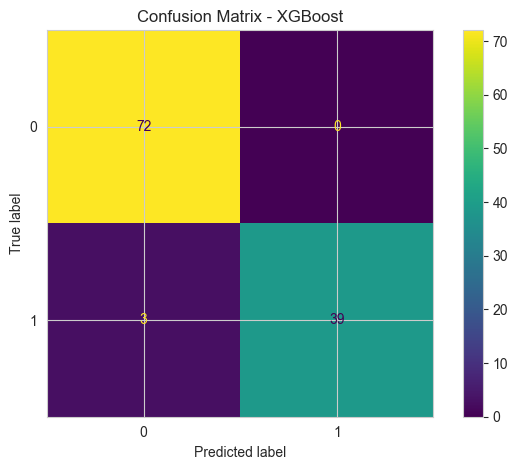

In [22]:
# Cell 10: Confusion matrices for all cancer models
# -------------------------------------------------
# - Generates confusion matrices for each trained model.
# - Shows True Positives, True Negatives, False Positives, False Negatives.
# - Useful for understanding what types of errors each model makes.

for name, model in cancer_trained_models.items():
    y_pred = model.predict(X_cancer_test)
    cm = confusion_matrix(y_cancer_test, y_pred)

    plt.figure(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()


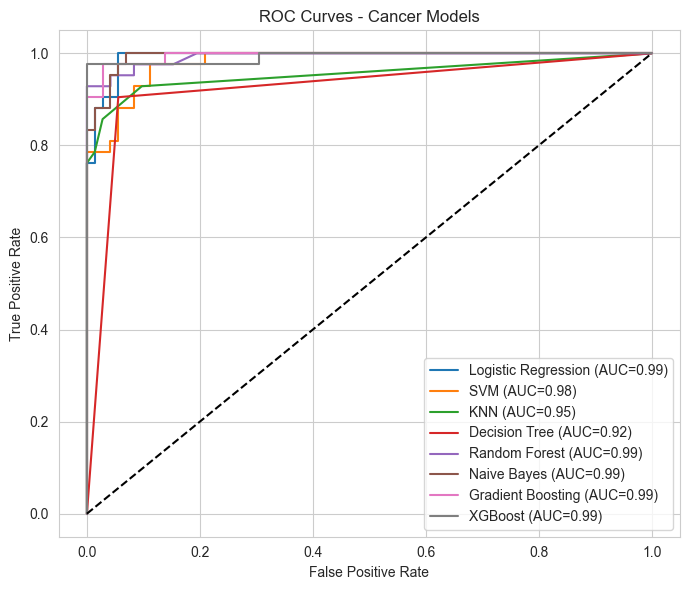

In [23]:
# Cell 11: ROC curve comparison for all cancer models
# ---------------------------------------------------
# - Plots ROC curves (TPR vs FPR) for each model that can output probability scores.
# - Computes AUC (Area Under Curve) to measure how well each model separates classes.
# - Helps identify which models have the best threshold-independent performance.

plt.figure(figsize=(7, 6))

for name, model in cancer_trained_models.items():
    # Get scores
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_cancer_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_cancer_test)
    else:
        continue  # skip models without a proper score

    fpr, tpr, _ = roc_curve(y_cancer_test, y_proba)
    auc = roc_auc_score(y_cancer_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Cancer Models")
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Cell 12: Select and evaluate the best cancer model
# --------------------------------------------------
# - Identifies the best model based on highest Test Accuracy.
# - Retrieves the trained model instance.
# - Generates a detailed classification report (precision, recall, F1).
# - This will later be used to save the best model for deployment.

best_cancer_model_name = cancer_results_df["Test_Accuracy"].idxmax()
best_cancer_model = cancer_trained_models[best_cancer_model_name]

print(f"Best Cancer Model: {best_cancer_model_name}\n")

y_cancer_pred_best = best_cancer_model.predict(X_cancer_test)
print("Classification Report for Best Cancer Model:\n")
print(classification_report(y_cancer_test, y_cancer_pred_best))


Best Cancer Model: Random Forest

Classification Report for Best Cancer Model:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [26]:
# Cell 13: Retrain best cancer model on full dataset and save for deployment
# -------------------------------------------------------------------------
# - Uses the best model selected in Cell 12 (based on Test Accuracy).
# - Retrains on the full dataset (all samples) for maximum performance.
# - Saves model as 'cancer_best_model.pkl' to be loaded by the Flask web app.

import os
import pickle

# Best model from previous cell
print(f"Retraining best cancer model ({best_cancer_model_name}) on full dataset...")

# Retrain on ALL available cancer data
best_cancer_model.fit(X_cancer, y_cancer)

# Save into App folder for Flask
model_path = os.path.join("..", "App", "cancer_best_model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(best_cancer_model, f)

print(f"Best cancer model ('{best_cancer_model_name}') retrained on full data and saved to: {model_path}")


Retraining best cancer model (Random Forest) on full dataset...
Best cancer model ('Random Forest') retrained on full data and saved to: ..\App\cancer_best_model.pkl
